# Алгоритмы классификации (продолжение)

In [1]:
import numpy as np
import csv
import pylab as plt
%matplotlib inline


In [2]:
# Загрузите обучающую выборку (признаки и метки классов)

ifile = open("train.csv", "r")

train_data = []
train_values = []

read = csv.reader(ifile)
next(read)

for row in read:
    num = []
    for i in row[1:]:
        num.append(int(i))
    train_data.append(num)
    for i in row[0]:
        train_values.append(int(i))
ifile.close()
        

In [3]:
data = train_data[:1000]
values = train_values[:1000]


In [268]:
# применить решающий лес
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# нарисовать график зависимости ошибки перекрестной проверки на тестовой части от числа деревьев (n_estimators). 
# Что означают и как влияют параметры criterion, max_depth, min_samples_split, min_samples_leaf ?


 Применим метод, используя **RandomForestClassifier** из библиотеки **sklearn.ensemble**. Переберем значения парметра ***n_estimators***, отвечающий за количество деревьев, и найдем оптимальное значение этого парметра в переделах от 1 до 200, на котором ошибка перекрестной проверки на тестовой части будет минимальной.

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score as cvs

means_1 = []
means_1.append(0)

for i in range(0, 201, 5):
    rfc = RandomForestClassifier(n_estimators=i+1)
    scores = cvs(rfc, data, values, cv=10)
    means_1.append(1 - scores.mean())


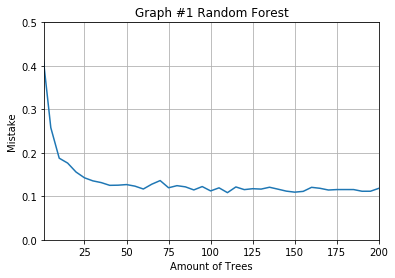

Минмальная ошибка равна 0.108421231084 при 120 деревьев.


In [5]:
x = []
x.append(0)
for i in range(0, 201, 5):
    x.append(i)
plt.xlim([1, 200])
plt.ylim([0, 0.5])
plt.title('Graph #1 Random Forest')
plt.plot(x, means_1)
plt.ylabel('Mistake')
plt.xlabel('Amount of Trees')
plt.grid()
plt.show()

print("Минмальная ошибка равна", min(means_1[1:]), "при", 5*(means_1.index(min(means_1[1:])) + 1), "деревьев.")


Параметр ***max_depth*** отвечает за глубину дерева. Возможные параметры: None(по умолчанию) - расширение дерева происходит до тех пор, пока все листья не будут построены, целое число - максимальная глубина дерева.

Параметр ***min_samples_split*** отвечает за минимальное количество выборок при делении узла. По умолчанию - 2. Также можно указать долю от общего количества выборок, указав вещественное число от 0 до 1. Тогда в качестве значения параметра будет вычесленно по формуле: (выбарнное число) * (общее количество)

Параметр ***min_samples_leaf*** отвечает за минимальное количество выборок на листьях при делении узла. По умолчанию - 1. Аналогично предыдущему методу можно взять часть от общего числа выборок, указав число от 0 до 1.

Параметр ***criterion*** отечает за меру расщипления. По умолчанию стоит "gini" - квадратичная функция расщипления, также возможен вариант "entropy" - логорифмическая функция расщипления.

Параметр ***n_estimators*** отвечает за количество деревьев.(количество этапов при использовании метода оценки)

In [2]:
# применить бустинг
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# какие параметры и как влияют на качество классификации?


Применим бустинг, используя **GradientBoostingClassifier** из библиотеки **sklearn.ensemble**. Посчитаем ошибку на перекрестной проверке.

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score as cvs

gbc = GradientBoostingClassifier()
scores_1 = cvs(gbc, data, values, cv=10)


In [9]:
print("Ошибка равна", 1 - scores_1.mean())


Ошибка равна 0.149872068863


Параметр ***max_depth*** отвечает за глубину дерева(максимальное количество уровней деления). По умолчанию - 3.

Параметр ***min_samples_split*** отвечает за минимальное количество выборок при делении узла. По умолчанию - 2. Также можно указать долю от общего количества выборок, указав вещественное число от 0 до 1. Тогда в качестве значения параметра будет вычесленно по формуле: (выбарнное число) * (общее количество)

Параметр ***min_samples_leaf*** отвечает за минимальное количество выборок на листьях при делении узла. По умолчанию - 1. Аналогично предыдущему методу можно взять часть от общего числа выборок, указав число от 0 до 1.

Параметр ***criterion*** отечает за меру расщипления. По умолчанию стоит "friedman_mse" - вычисление среднеквадратичной ошибки по Фридману, также возможен вариант “mse” - вычисление простой среднеквадратичной ошибки,  “mae” - для вычисления абсолютной ошибки.

Параметр ***n_estimators*** отвечает за количество этапов бустинга. По умолчанию - 100. Обычно с ростом количества этапов увеличивается качество работы.

In [11]:
# Сделайте выводы о лучшем методе, среди рассмотренных на занятии 2 и 3.


Судя по средней ошибке, полученной на перекрестной проверке, лучшим метод является Решающий Лес.

# Работа с бинарными изображениями
## с помощью библиотеки http://scikit-image.org

In [4]:
# бинаризовать изображения, привести примеры картинок
# http://scikit-image.org/docs/dev/auto_examples/xx_applications/plot_thresholding.html


Бинаризуем изображения цифр(от 1 до 5), с помощью метода **threshold_mean** из библиотеки **skimage.filters**. Заведем функицю ***make_binary()***, которая будет принимает на вход изображение(матрицу) в градации серого и  возвращать бинаризованное(черно-белое) изображение.

In [10]:
from skimage.filters import threshold_mean

def make_binary(image):
    thr = threshold_mean(image)
    binary = image > thr
    return binary


Слева выведем обычное изображение, справа - бинаризованное.


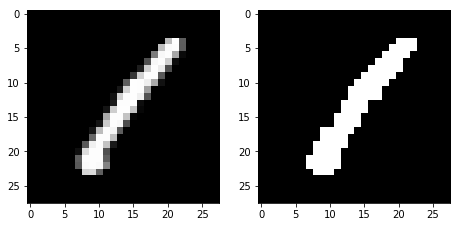

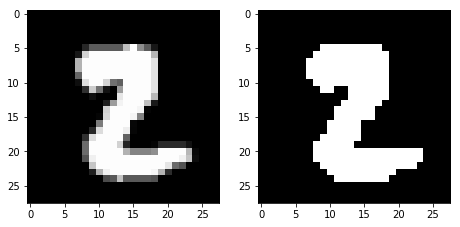

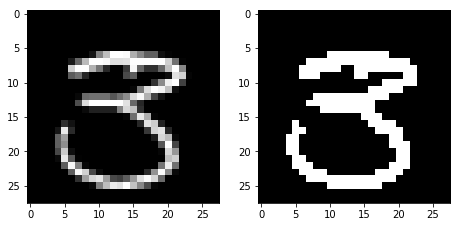

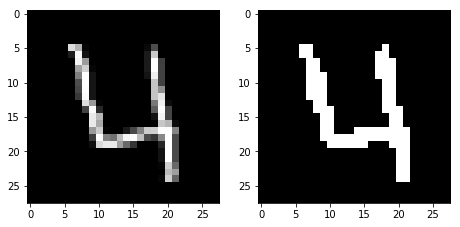

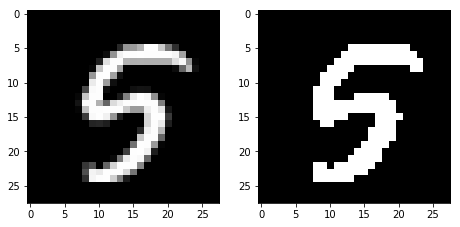

In [11]:
res = []
indexes = []
j = 1

for i in range(1,6):
    index = values.index(i)
    res.append(data[index])
    res.append(make_binary(data[index]))
    
print("Слева выведем обычное изображение, справа - бинаризованное.")
    
for i in range(0, 10, 2):
    plt.figure(figsize=(20, 10))
    for j in range(2):
        plt.subplot(2, 5, j + 1)
        plt.imshow(np.reshape(res[i + j], (28, 28)), cmap="gray")
    plt.show()
    

In [5]:
# выбрать несколько типичных изображений цифр и несколько не типичных (разомнутую 6, не связные из-за шума и т.п.)
# применить к ним замыкание и размыкание в разных вариантах и порядке
# выбрать наилучший вариант визуально, применить его ко всей выборке
# http://scikit-image.org/docs/dev/api/skimage.morphology.html


Рассмотрим изображения с дефектами и пременим замыкание и размыкание, воспользовавшись **binary_closing** и **binary_opening** из библиотеки **skimage.morphology**.
Затем совместим эти методы и пременим в разной последовательности, выведем результат и выберем наиучший визуально.

In [12]:
from skimage.morphology import binary_closing
from skimage.morphology import binary_opening

un_id = [498, 220, 276, 242]
results = []

for ind in un_id:
    results.append(data[ind])
    binary_im = make_binary(data[ind])
    im_closing = binary_closing(binary_im)
    im_opening = binary_opening(binary_im)
    results.append(binary_im)
    results.append(im_closing)
    results.append(im_opening)
    results.append(binary_opening(im_closing))
    results.append(binary_closing(im_opening))
    

Первый столбик - обычное изображение цифры, второй - бинаризованное изображение.
Третий столбик - изображение, полученное при замыкании, четвертый - изображение, полученное при размыкании.
Пятый - изображение, полученное при замыкании-размыкании, шестой - изображение, полученное при размыкании-замыкании.


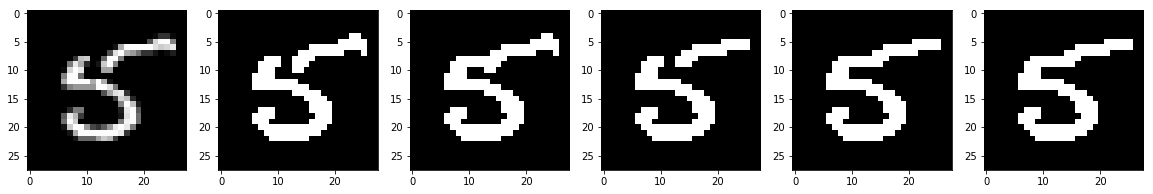

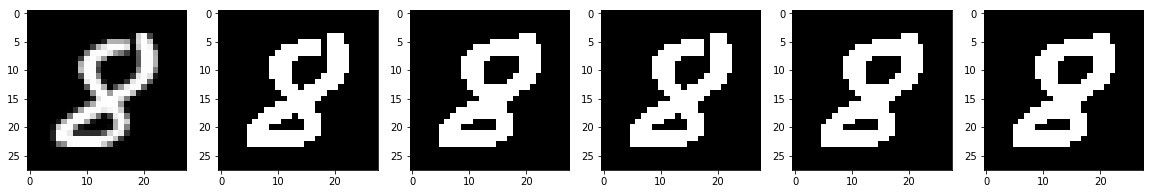

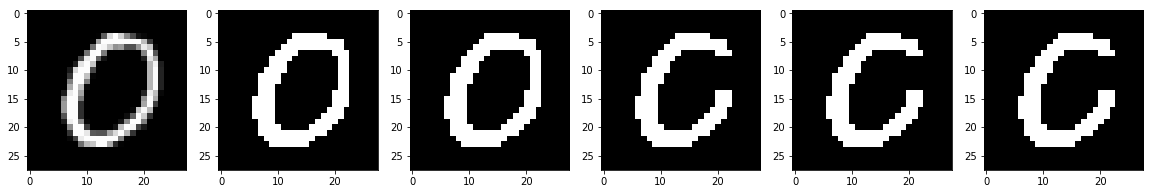

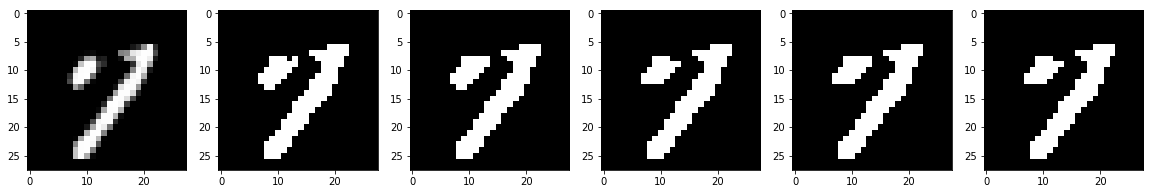

In [13]:
print("Первый столбик - обычное изображение цифры, второй - бинаризованное изображение.")
print("Третий столбик - изображение, полученное при замыкании, четвертый - изображение, полученное при размыкании.")
print("Пятый - изображение, полученное при замыкании-размыкании, шестой - изображение, полученное при размыкании-замыкании.")
for i in range(0, 24, 6):
    plt.figure(figsize=(20, 10))
    for j in range(6):
        plt.subplot(2, 6, j + 1)
        plt.imshow(np.reshape(results[i + j], (28, 28)), cmap="gray")
    plt.show()

Визуально видно, что лучше всего справляется с задачей - единичное замыкание, однако, как видно из картинок, оно работает не всегда. Применим его для всей выборки(первых 1000 изображений).

In [14]:
close_data = []

for i in data:
    close_data.append(binary_closing(make_binary(i)))
    

In [273]:
# построить скелеты изображений
# визуально выбрать лучшие параметры (skeletonize, medial_axis)
# нарисовать примеры результатов


Посмотрим скелеты цифр, воспользовавшись **skeletonize** и **medial_axis** из **skimage.morphology**, выведем и сравним результаты, выберем наилучший.

In [15]:
from skimage.morphology import skeletonize
from skimage.morphology import medial_axis

skel_data = [214, 265, 553, 453]
skel_images = []

for skel in skel_data:
    skel_images.append(data[skel])
    bin_img = make_binary(data[skel])
    skel_im = skeletonize(np.reshape(bin_img, (28, 28)))
    med_im = medial_axis(np.reshape(bin_img, (28, 28)))
    skel_images.append(skel_im)
    skel_images.append(med_im)
    

Первый столбик - обычное изображение цифры, второй - скелет, полученный методом skeletonize.
Третий - скелет, полученный методом medial_axis.


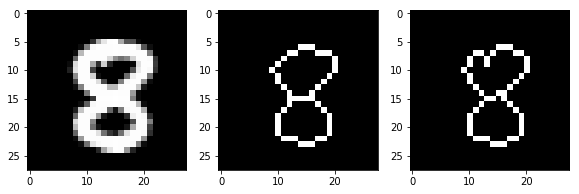

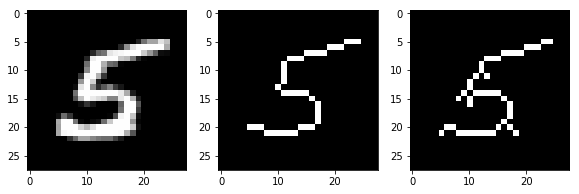

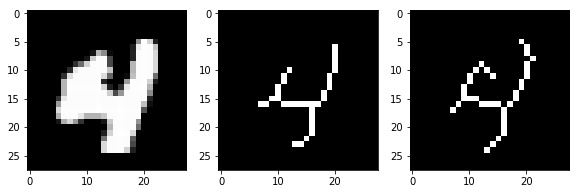

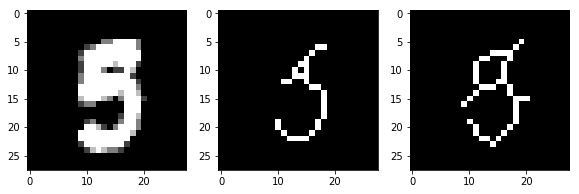

In [275]:
print("Первый столбик - обычное изображение цифры, второй - скелет, полученный методом skeletonize.")
print("Третий - скелет, полученный методом medial_axis.")
for i in range(0, 12, 3):
    plt.figure(figsize=(20, 10))
    for j in range(3):
        plt.subplot(2, 6, j + 1)
        plt.imshow(np.reshape(skel_images[i + j], (28, 28)), cmap="gray")
    plt.show()
    

Визуально видно, что наиболее приближенный скелет строит метод **skeletonize**.

In [276]:
# сгенерировать признаки по изображениям и их склетам (площадь, запас связности, ширина и т.д.)


Добавим собственные признаки. Будем учитывать высоту цифры - функция ***find_hight()***, ширину - функция ***find_width()*** и площадь - ***find_space()***.

In [16]:
def find_hight(image):
    img = np.array(image).reshape(28, 28)
    lowest_row, highest_row = 28, 0
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j]:
                if i > highest_row:
                    highest_row = i
                if i < lowest_row:
                    lowest_row = i
    res = highest_row - lowest_row + 1
    return res

def find_width(image):
    img = np.array(image).reshape(28, 28)
    left_col = 28
    right_col = 0
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j]:
                if j > right_col:
                    right_col = j
                if j < left_col:
                    left_col = j
    res = right_col - left_col + 1
    return res

def find_space(image):
    img = np.array(image).reshape(28, 28)
    space = 0
    for i in range(len(img)):
        for j in range(len(img[0])):
            if img[i][j]:
                space += 1
    return space


In [278]:
# добавить ваши признаки к признаковому описанию и применить решающие дереья. Сравнить результат с результатом с занятия 2

Добавим новые признаковые описания как самих цифр, так и их скелетов.Подсчитаем ошибку перекрестной проверки на решающих деревьях.

In [17]:
data_1 = []

for i in data:
    data_1.append(i)

for i in range(1,len(close_data)):
    data_1[i].append(find_hight(close_data[i]))
    data_1[i].append(find_width(close_data[i]))
    data_1[i].append(find_space(close_data[i]))
    skeleton = skeletonize(np.reshape(close_data[i], (28, 28)))
    data_1[i].append(find_hight(skeleton))
    data_1[i].append(find_width(skeleton))
    data_1[i].append(find_space(skeleton))
    

In [18]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score as cvs

clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=1, 
                                    max_depth=11, min_samples_split=2)
scores = cvs(clf, data_1[1:], values[1:], cv=10)
print("Ошибка при добавлении новых признаковых описаниях",1 - scores.mean())


Ошибка при добавлении новых признаковых описаниях 0.329658811703


# Метод главных компонент

In [19]:
ifile = open("train.csv", "r")

train_data = []
train_values = []

read = csv.reader(ifile)
next(read)

for row in read:
    num = []
    for i in row[1:]:
        num.append(int(i))
    train_data.append(num)
    for i in row[0]:
        train_values.append(int(i))
        

In [20]:
data = train_data[:1000]
values = train_values[:1000]


In [283]:
# найти среднее изображение

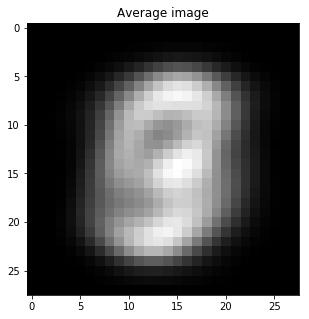

In [22]:
averege = [np.zeros((28, 28)) for i in range(10)]
averege_am = [0 for i in range(10)]
for_all = np.zeros((28, 28))
all_am = 0

for k in range(len(train_values)):
    for_all += np.reshape(train_data[k], (28, 28))
    all_am += 1
    averege[train_values[k]] += np.reshape(train_data[k], (28, 28))
    averege_am[train_values[k]] += 1
    
plt.figure(figsize=(5, 5))
for_all /= all_am
plt.title("Average image")
plt.imshow(for_all, cmap="gray")


In [10]:
# вычислить матрицу выборочной ковариации (сигма). Какого она размера?


Найдем матрицу ковариации с помощью сингулярного разложения(библиотека **scipy.linalg**).

In [23]:
from scipy.linalg import svd

matrix = np.cov(np.array(train_data[:1000]).T)

print("Размер матрицы", matrix.shape)


Размер матрицы (784, 784)


In [11]:
# вычислить собственные векторы и собственные числа матрицы сигма. 
# Упорядочить их так, чтобы они располагались в порядке невозрастания собственных чисел,
# а собственные векторы были расположены по столбцу


In [24]:
eig_vals, eig_vecs = np.linalg.eig(matrix)

eig_vecs = eig_vecs.T
indexes = np.argsort(eig_vals)

indexes = indexes[::-1]
eig_vals = np.array(eig_vals)[indexes]
eig_vecs = np.array(eig_vecs)[indexes]

eig_vecs = eig_vecs.T


In [263]:
# по графику кумулятивной суммы собственных чисел дать рекомендации по выбору размерности (0.9; 0.95; 0.99)


Подсчитаем кумулятивную сумму и построим график в зависимости от размерности. Выведем ее и найдем оптимальные значения для 0.9; 0.95; 0.99.

//anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


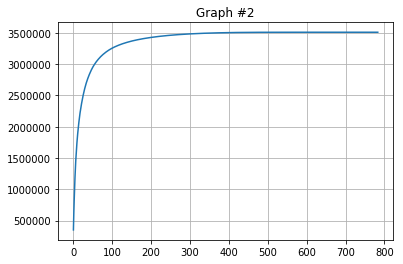

Для 0.9 рекомендованная размерность 77 
Для 0.95 рекомендованная размерность 130 
Для 0.99 рекомендованная размерность 277 


In [25]:
cum_var =  np.cumsum(eig_vals)

    
dimension = [0, 0, 0]
nums = [0.9, 0.95, 0.99]
ind = 0
for num in nums:
    index = (np.abs(cum_var - num * cum_var[-1])).argmin()
    dimension[ind] = index
    ind += 1
    #plt.axhline(y=size * summ[-1], color='r', linestyle=':')
    #plt.axvline(x=idx, color='g', linestyle=':')
    
    
    
plt.title('Graph #2')
plt.plot(cum_var)
plt.grid()
plt.show()

for i in range(3):
    print("Для {0} рекомендованная размерность {1} ".format(nums[i], dimension[i]))
    

In [13]:
# нарисовать проекции нескольких цифр на аффинные пространства реккомендованной размерности. 
# Нарисовать проекции на пространства меньшей и большей размерности


In [26]:
print(dimension)


[77, 130, 277]


Нарисуем проекции цифр на пространства размерности 77, 130 и 277.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:5: ComplexWarning: Casting complex values to real discards the imaginary part


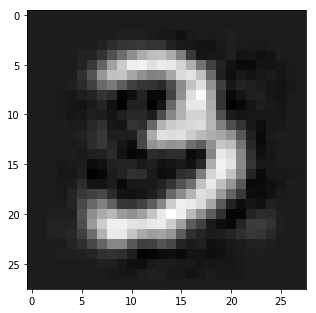

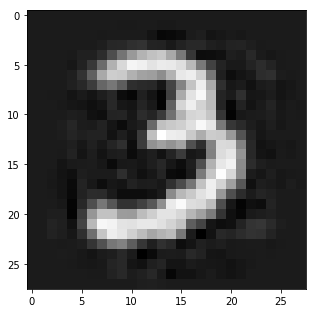

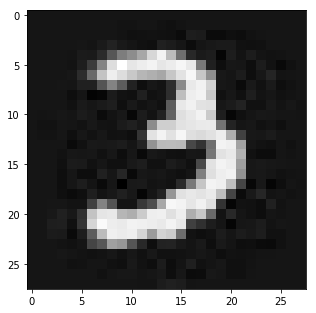

In [27]:
for dim in dimension:
    new_mat = np.dot(np.array(eig_vecs[:,:dim]).T, np.array(train_data[9]).T)
    new_mat = np.dot(new_mat.T, np.array(eig_vecs[:,:dim]).T)
    plt.figure(figsize=(5, 10))
    plt.imshow(new_mat.reshape(28,28).astype(int), cmap="gray")
    plt.show()
    

In [ ]:
# Применить решающие деревья к выборке меньшей размерности (признаки --- главные координаты)
# Как изменилось качество?


Возьмем первые 1000 изображений и построим их в трех рекомендованных размерностях. С помощью Решающих Деревьев подсчитаем ошибку на перекрестной проверке для каждой размерности и сравним ее без ограничения размерности. Возьмем оптимальные значения параметров из задания 2.

In [28]:
from scipy.linalg import svd

new_data = [[], [], []]

for d in data:
    index = 0
    for dim in dimension:
        new_mat = np.dot(np.array(eig_vecs[:,:dim]).T, np.array(d).T)
        new_mat = np.dot(new_mat.T, np.array(eig_vecs[:,:dim]).T)
        new_data[index].append(new_mat.reshape(28 * 28))
        index += 1
        

In [29]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import cross_val_score as cvs

means_3 = []

for i in range(3):
    clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=1, 
                                    max_depth=11, min_samples_split=2)
    b = new_data[i]
    scores = cvs(clf, b, values, cv=10)
    means_3.append(1 - scores.mean())

for i in range(3):
    print("На размерности {0} ошибка равна {1}".format(dimension[i], means_3[i]))
    

//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:402: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:402: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:402: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:402: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)
//anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:402: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.

На размерности 77 ошибка равна 0.3613065244211272
На размерности 130 ошибка равна 0.3596774396377572
На размерности 277 ошибка равна 0.36804999254090176


In [30]:
print("Средняя ошибка получилась", np.array(means_3).mean())


Средняя ошибка получилась 0.363011318867


In [31]:
clf = DecisionTreeClassifier(criterion="entropy", min_samples_leaf=1, 
                                    max_depth=11, min_samples_split=2)
scores = cvs(clf, data, values, cv=10)
print("Ошибка без ограничения размерности равна", 1 - scores.mean())


Ошибка без ограничения размерности равна 0.345278962138


Ошибка в среднем увеличилась, значит качество ухудшилось.